# 1. What Factors Sell a Car?

Hundreds of free vehicle ads and datasets are available on the websites such as kraggle.com every day. An analyst needs to study a collection of data over the past few years and determine the factors that influence the price of a vehicle.

The aim of this project is to find out how the following factors influence car selling prices in general:
1. Mileage
2. Age
3. Paint color
4. Transmission type

To be able to draw the conclusions above, the process stages in this project are:
1. Data pre-processing
2. Address missing values
3. Improve data type and quality
4. Study core parameters
5. Get rid of outliers and re-study the core parameters without outliers
6. Draw conclusions about how long advertisements are generally shown to determine the minimum length of advertisements as a consideration for involving data in the analysis.
7. Draw conclusions about the general price of each type of car
8. Analyze the relationship to car prices from the 4 factors that are the aim of this project

# 1.1. Pre-processing

Load the required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2.1 Loading Data

In [5]:

path = 'vehicles_dataset_from_advertisement.csv'
car_ads = pd.read_csv(path)


# 2.2 Exploring Initial Data


The dataset contains the following columns:


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` —vehicle mileage when the ad is shown 
- `transmission`
- `paint_color`
- `is_4wd` —whether the vehicle has 4 wheel drive (Boolean type))
- `date_posted` —the date the ad was broadcast 
- `days_listed` —number of days the ad is displayed until it is removeds

In [6]:
# show general information/summary about the DataFrame
car_ads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:

# show sample data
car_ads.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [8]:

# contains statistical descriptions
car_ads.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [9]:

# check the distribution of values ​​in each column
for column in car_ads.columns:
    print(car_ads[column].value_counts(dropna=False))
    

price
1        798
6995     719
5995     655
4995     624
3500     620
        ... 
58500      1
3993       1
32987      1
3744       1
7455       1
Name: count, Length: 3443, dtype: int64
model_year
NaN       3619
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1929.0       1
Name: count, Length: 69, dtype: int64
model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64
condition
excellent    24773
good         20145
like new      4742
fair          1607
new 

In [10]:

#check for duplicate rows
car_ads.duplicated().sum()

0

From the info it looks like a lot of value is missing. Some data types do not match the values, namely in the is_4wd, cylinders, model_year, and date_posted columns.

The data type for the question whether the vehicle is *four-wheel drives* should be boolean. Year and number of cylinders should also be integers. And the date should be datetime.

In [11]:
#check the number of missing values
car_ads.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Missing values ​​are in 5 columns: model_year, cylinders, is_4wd, odometer, and paint_color. The most common column is is_4wd. This means about 50% of the total rows.

# 4.0 Conclusion and Next Steps
No duplicate data.
The most missing values ​​are in the four-wheel drive feature column. This is a boolean data type. If all the values ​​filled in are boolean 1, we can assume the missing values ​​are for boolean values ​​0 or False.

While the number of cylinders is not a hypothetical variable, we might be able to allow other values.

However, this is not the case for other columns that contain missing values, namely model_year, odometer, and paint_color. In this analysis we will test the influence of car age, odometer, condition, transmission and paint color on price. That way, missing values ​​in the model_year, odometer, and paint_color columns need to be analyzed properly before deciding how to handle them.

# 5.1 
Addressing Lost Values


Handle missing values ​​inthe  is_4wd column.

In [12]:

# check the value in the is_4wd column
car_ads['is_4wd'].value_counts(dropna=False)

is_4wd
NaN    25953
1.0    25572
Name: count, dtype: int64

We find that the values ​​in is_4wd all contain boolean 1. Let's replace the missing values ​​in the is_4wd column with boolean 0 as we assume that the missing values ​​are actually boolean 0.

In [13]:

#replace missing values ​​with 0
car_ads['is_4wd'] = car_ads['is_4wd'].fillna(0)

In [14]:

#check the is_4wd column again
car_ads['is_4wd'].value_counts(dropna=False)

is_4wd
0.0    25953
1.0    25572
Name: count, dtype: int64

Next let's handle the missing values ​​of the model_year column. In the model_year column, missing values ​​are the largest portion in terms of value distribution. So it's important to think about how to fill it. To not shift the data distribution too much for the sake of the Exploratory Data Analysis (EDA) process, missing values ​​will be filled with medians based on the existing model group. The median was chosen over the mean because of the large number of outliers in the model_year data.

In [15]:
# check the distribution of the top 10 values ​​in model_year
car_ads['model_year'].value_counts(dropna=False, normalize=True).head(10)

model_year
NaN       0.070238
2013.0    0.068879
2012.0    0.067307
2014.0    0.066919
2011.0    0.065502
2015.0    0.064493
2016.0    0.057331
2008.0    0.056749
2010.0    0.052227
2007.0    0.051295
Name: proportion, dtype: float64

In [16]:
# check the median by model
car_ads.groupby('model')['model_year'].median()

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

<Axes: >

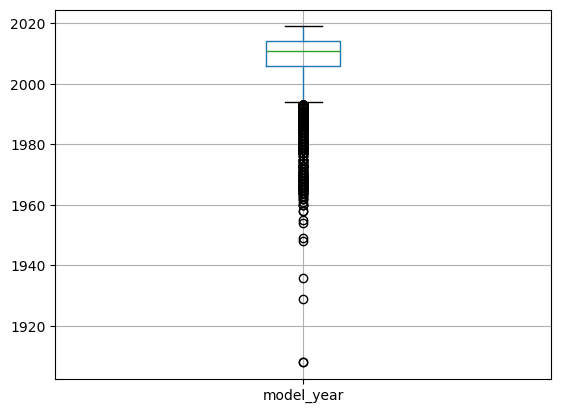

In [17]:
# check for outliers in model_year
car_ads.boxplot('model_year')

In [18]:
# write a function that will be used to fill in missing values ​​in an existing column
def fill_na(data, agg_column, value_column):
    grouped_values = data.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for n in range(size):
        group = grouped_values[agg_column][n]
        value = grouped_values[value_column][n]
        data.loc[(data[agg_column]==group) & (data[value_column].isna()), value_column] = value
    return data

In [19]:
# apply function to fill in missing values ​​in model_year
car_ads = fill_na(data=car_ads, agg_column='model', 
                              value_column='model_year')


In [20]:
# load info data
car_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [21]:
# check statistical description in model_year
car_ads['model_year'].describe()

count    51525.000000
mean      2009.793954
std          6.099296
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

It can be seen that the distribution of values ​​in model_year has not changed significantly. Missing values ​​have been filled in but the distribution is not affected much. This is because the typical value used is the median per model group.

Next let's handle the missing values ​​of the `odometer` column.

In the `odometer` column, the missing value is the largest portion. From the available data, the factor that best proxies the mileage of a car is condition. So the missing odometer value will be filled with the median based on the condition. By choosing this, the data distribution does not change significantly.n.

In [22]:
# check the distribution of values ​​on the odometer
car_ads['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [23]:
# apply function to fill missing values ​​in odometer
car_ads = fill_na(data=car_ads, agg_column='condition', 
                              value_column='odometer')


In [24]:
# recheck the distribution of values ​​on the odometer after missing values ​​are filled in
car_ads['odometer'].describe()

count     51525.000000
mean     115199.014508
std       60484.863376
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

Next let's handle the missing values ​​of the `cylinders` column.

In the `cylinders` column, the portion of values ​​missing is 10%. Every car must have a cylinder. From the available data, the factor most related to cylinders is `model`. Therefore, missing values ​​will be filled using typical data based on `model`. The median will be used as a substitute for missing values ​​because the data form is discrete.

In [25]:
# check the distribution of the top 10 values ​​in the cylinders
car_ads['cylinders'].value_counts(dropna=False,normalize=True).head(10)

cylinders
8.0     0.307501
6.0     0.304706
4.0     0.269073
NaN     0.102086
10.0    0.010655
5.0     0.005279
3.0     0.000660
12.0    0.000039
Name: proportion, dtype: float64

To decide to fill in the missing values ​​for `cylinders`, let's see whether a certain number of cylinders dominates each existing model, namely by looking at the distribution of cylinder values ​​in several sample models.

In [26]:
# check the top-3 models in the cylinders row with missing values

car_ads.loc[car_ads['cylinders'].isna()]['model'].value_counts().head(3)

model
ford f-150                  316
chevrolet silverado 1500    231
ram 1500                    185
Name: count, dtype: int64

In [27]:
# check the distribution of cylinders in the `ford f-150` model
car_ads.query('model == "ford f-150"')['cylinders'].value_counts()

cylinders
8.0     1584
6.0      863
10.0      18
4.0       11
3.0        2
5.0        2
Name: count, dtype: int64

In [28]:
# check the distribution of cylinders in the `chevrolet silverado 1500` model
# if different model select karna he to wo bhi kar sakte he..

car_ads.query('model == "chevrolet silverado 1500"')['cylinders'].value_counts()

cylinders
8.0     1714
6.0      219
4.0        4
10.0       3
Name: count, dtype: int64

In [29]:
# check the distribution of cylinders in the `ram 1500` model
car_ads[car_ads['model'] == 'ram 1500']['cylinders'].value_counts()

cylinders
8.0     1348
6.0      199
10.0      17
4.0        1
Name: count, dtype: int64

From the 3 samples it was found that the model had a certain number of cylinders that dominated. Therefore, the median number of cylinders according to the model will be used to fill in the missing values ​​for cylinders. At the same time not to shift the overall data distribution too much.

In [30]:
# Fill in missing values ​​by applying the fill_na function to missing values ​​in cylinders
car_ads = fill_na(data=car_ads,
                         agg_column='model',
                         value_column='cylinders')

In [31]:
# check the distribution of the top 10 values ​​in the cylinders
car_ads['cylinders'].value_counts(dropna=False,normalize=True).head(10)

cylinders
8.0     0.343755
6.0     0.338379
4.0     0.300805
10.0    0.010655
5.0     0.005706
3.0     0.000660
12.0    0.000039
Name: proportion, dtype: float64

It can be seen that the distribution of values ​​in the cylinders has not changed significantly. Missing values ​​have been filled in but the distribution is not affected much. This is because the typical value used is the median per model group.

Next let's handle missing values ​​in `paint_color`. The color of the car cannot be related to the model or other factors. And this factor will be analyzed for its influence on prices. In order not to disrupt data distribution, `unknown` will be used to fill in missing values.

In [32]:
# check the distribution of values ​​in paint_color
car_ads['paint_color'].value_counts(dropna=False)

paint_color
white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

In [33]:
# fill missing values ​​with unknown
car_ads['paint_color'] = car_ads['paint_color'].fillna('unknown')

In [34]:
# check again the number of missing values
car_ads.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## 6.0 Fixed Data Type

The data is complete, it's time to correct the data type.

In [35]:
# change the model_year, is_4wd, and cylinders data types to integer
car_ads['model_year'] = car_ads['model_year'].astype('int')
car_ads['is_4wd'] = car_ads['is_4wd'].astype('bool')
car_ads['cylinders'] = car_ads['cylinders'].astype('int')


In [36]:
# change the date data type to datetime.
car_ads['date_posted'] = pd.to_datetime(car_ads['date_posted'], format='%Y-%m-%d')


In [37]:
# load general car_ads info
car_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(2), int64(2), object(6)
memory usage: 4.4+ MB


Missing values ​​have been handled and data types have been adjusted for each column required for EDA and feature engineering for further analysis.

## 6.2 Improving Data Quality

The data will be added with other necessary factors to make it easier to analyze.

In [38]:
# load sample data
car_ads.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


In [39]:
# Add time and date values ​​when the ad is displayed
car_ads['day_name_posted'] = car_ads['date_posted'].dt.day_name()
car_ads['day_posted'] = car_ads['date_posted'].dt.day
car_ads['month_posted'] = car_ads['date_posted'].dt.month
car_ads['month_name_posted'] = car_ads['date_posted'].dt.month_name()
car_ads['year_posted'] = car_ads['date_posted'].dt.year


In [40]:
# Add the age of the vehicle when the ad is displayed
car_ads['age'] = car_ads['year_posted'] - car_ads['model_year']

In [41]:
# Fill in the age 0 value with 1, so that it can be used as a denominator for dividing the average odometer per year
car_ads.loc[car_ads['age'] < 1, 'age'] = 1


In [42]:
# check if there is still an age that is 0
car_ads[car_ads['age'] < 1]['age']

Series([], Name: age, dtype: int32)

In [43]:
# Add the average vehicle mileage per year
car_ads['odometer_annual'] = car_ads['odometer']/car_ads['age']

In [44]:
# check the value in condition
car_ads.condition.unique()


array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [45]:
# Replace the value in the 'condition' column with something that can be manipulated more easily 
car_ads['condition'] = car_ads['condition'].map({'good':2, 'like new':4, 'fair':1, 
                                                 'excellent':3, 'salvage':0, 'new':5})
    


In [46]:
# count unique values for car_ads['condition'] 
car_ads['condition'].value_counts()


condition
3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: count, dtype: int64

## 6.3 Checking Clean Data

now time to check the clean data

In [47]:
# show general information/summary about the DataFrame
car_ads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int32         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  int64         
 4   cylinders          51525 non-null  int32         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  day_name_posted    51525 non-null  object        
 14  day_po

In [48]:
# show sample data
car_ads.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_name_posted,day_posted,month_posted,month_name_posted,year_posted,age,odometer_annual
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday,23,6,June,2018,7,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,Friday,19,10,October,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,7,2,February,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,Friday,22,3,March,2019,16,11350.812500
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2,4,April,2019,2,40451.500000


## 6.4 Studying Core Parameters
The parameters to be studied are:
- Price
- Vehicle age when the ad is displayed
- Mileage
- Number of cylinders
- Condition

For numerical ratio parameters, namely: price, age, odometer, histogram will be used.

Meanwhile, for ordinal categorical parameters, namely: cylinders, condition, countplot will be used.

And to check for the presence of outliers, a boxplot will be used to depict the distribution in each parameter.

Functions will be defined so that coding does not need to be written repeatedly.

In [49]:
# contains statistical descriptions
car_ads.describe()

,price,model_year,condition,cylinders,odometer,date_posted,days_listed,day_posted,month_posted,year_posted,age,odometer_annual
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,2.637535,6.121067,115199.014508,2018-10-25 01:57:46.270742528,39.55476,15.449491,6.628491,2018.307462,8.555672,18930.822069
min,1.000000,1908.000000,0.000000,3.000000,0.000000,2018-05-01 00:00:00,0.00000,1.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,2018-07-29 00:00:00,19.00000,8.000000,3.000000,2018.000000,4.000000,10423.000000
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,2018-10-25 00:00:00,33.00000,15.000000,7.000000,2018.000000,8.000000,14982.500000
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,2019-01-21 00:00:00,53.00000,23.000000,10.000000,2019.000000,12.000000,21800.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,2019-04-19 00:00:00,271.00000,31.000000,12.000000,2019.000000,110.000000,373200.000000
std,10040.803015,6.099381,0.712447,1.657457,60484.863376,NaN,28.20427,8.736521,3.474134,0.461447,6.057829,16268.514686


In [50]:
# create a boxplot function using a loop
def create_boxplot(df, columns):
    plt.subplots(figsize = (20, 16))
    for i, column in enumerate(columns):
        sns.boxplot(data=df, x=column, ax = plt.subplot(2, len(columns)-2, i + 1))
        plt.xticks(rotation = 45)
        plt.title(column+' distribution')


In [51]:
# load boxplots for each parameter using the create_boxplot function
parameters = ('price', 'age', 'odometer', 'cylinders', 'condition')
create_boxplot(car_ads, parameters)

In [52]:
# create a histplot function using a loop
def create_histplot(df, columns):
    plt.subplots(figsize = (16, 4))
    for i, column in enumerate(columns):
        sns.histplot(data=df, x=column, ax = plt.subplot(1, len(columns), i+1))
        plt.xticks(rotation = 45)
        plt.title(column+' distribution')


In [53]:
# create a countplot function using a loop
def create_countplot(df, columns):
    plt.subplots(figsize = (16, 4))
    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, ax = plt.subplot(1, len(columns), i + 1))
        plt.xticks(rotation = 45)
        plt.title(column+' distribution')

In [54]:
parameter_numeric = ('price', 'age', 'odometer')
parameter_category = ('cylinders', 'condition')

In [55]:
# load histograms for parameters: price, age, mileage
create_histplot(car_ads, parameter_numeric)

In [56]:
# load countplot for parameters: cylinder and condition
create_countplot(car_ads, parameter_category)

## 6.5 Studying and Handling Outliers
From the graph above, it can be seen that the price, age, and odometer columns have outliers. While Cylinders do not.

The next step is defining outliers and filtering them from the data.

In [57]:
# define a function to determine the lower and upper limits of outliers based on Q1 and Q3
def bound(df, column):
    Q3 = df[column].quantile(0.75)
    Q1 = df[column].quantile(0.25)
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return lower_bound, upper_bound

In [58]:
# create a function to clean outliers
def filter_outlier(df, column, lower_bound, upper_bound):
    if lower_bound < 0:
        lower_bound = 0

    # Clean Outlier to the bounds
    df = df.loc[(df[column] < upper_bound) & (df[column] > lower_bound)]
    return df

In [59]:
# create a function that cleans the data from outliers
def clean_data(df, columns):
    for column in columns:
        lower_bound = bound(df, column)[0]
        upper_bound = bound(df, column)[1]
        df = filter_outlier(df, column, lower_bound, upper_bound)
    return df

In [60]:
# Apply the function to create a new, clean dataframe
columns = ('price', 'age', 'odometer')
car_ads_clean = clean_data(df=car_ads, columns=columns)


In [61]:
# Contains a statistical description of the data that is clean from outiers
car_ads_clean.describe()

,price,model_year,condition,cylinders,odometer,date_posted,days_listed,day_posted,month_posted,year_posted,age,odometer_annual
count,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000
mean,11273.531047,2010.141095,2.639060,6.051011,113819.105080,2018-10-24 21:18:16.207551488,39.539250,15.454843,6.632694,2018.306568,8.198451,18798.411014
min,1.000000,1995.000000,0.000000,3.000000,1.000000,2018-05-01 00:00:00,0.000000,1.000000,1.000000,2018.000000,1.000000,0.052632
25%,5000.000000,2007.000000,2.000000,4.000000,79000.000000,2018-07-29 00:00:00,19.000000,8.000000,3.000000,2018.000000,4.000000,10596.750000
50%,8995.000000,2011.000000,3.000000,6.000000,112000.000000,2018-10-24 00:00:00,33.000000,15.000000,7.000000,2018.000000,7.000000,14928.461538
75%,15995.000000,2014.000000,3.000000,8.000000,146000.000000,2019-01-21 00:00:00,53.000000,23.000000,10.000000,2019.000000,11.000000,21584.125000
max,34595.000000,2019.000000,5.000000,12.000000,253000.000000,2019-04-19 00:00:00,271.000000,31.000000,12.000000,2019.000000,23.000000,195700.000000
std,7836.391772,4.965727,0.697721,1.656933,52531.716484,NaN,28.207371,8.740585,3.472197,0.461073,4.927496,15395.192234


## 6.6 
Studying Core Parameters Without Outliers

With the data cleaned of outliers, a histogram, countplot, and boxplot will be created.

In [62]:
# contains a statistical description of the original data
car_ads.describe()

,price,model_year,condition,cylinders,odometer,date_posted,days_listed,day_posted,month_posted,year_posted,age,odometer_annual
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,2.637535,6.121067,115199.014508,2018-10-25 01:57:46.270742528,39.55476,15.449491,6.628491,2018.307462,8.555672,18930.822069
min,1.000000,1908.000000,0.000000,3.000000,0.000000,2018-05-01 00:00:00,0.00000,1.000000,1.000000,2018.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,2018-07-29 00:00:00,19.00000,8.000000,3.000000,2018.000000,4.000000,10423.000000
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,2018-10-25 00:00:00,33.00000,15.000000,7.000000,2018.000000,8.000000,14982.500000
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,2019-01-21 00:00:00,53.00000,23.000000,10.000000,2019.000000,12.000000,21800.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,2019-04-19 00:00:00,271.00000,31.000000,12.000000,2019.000000,110.000000,373200.000000
std,10040.803015,6.099381,0.712447,1.657457,60484.863376,NaN,28.20427,8.736521,3.474134,0.461447,6.057829,16268.514686


In [63]:
# contains a statistical description after the data has been filtered for outliers
car_ads_clean.describe()

,price,model_year,condition,cylinders,odometer,date_posted,days_listed,day_posted,month_posted,year_posted,age,odometer_annual
count,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000,47911.000000
mean,11273.531047,2010.141095,2.639060,6.051011,113819.105080,2018-10-24 21:18:16.207551488,39.539250,15.454843,6.632694,2018.306568,8.198451,18798.411014
min,1.000000,1995.000000,0.000000,3.000000,1.000000,2018-05-01 00:00:00,0.000000,1.000000,1.000000,2018.000000,1.000000,0.052632
25%,5000.000000,2007.000000,2.000000,4.000000,79000.000000,2018-07-29 00:00:00,19.000000,8.000000,3.000000,2018.000000,4.000000,10596.750000
50%,8995.000000,2011.000000,3.000000,6.000000,112000.000000,2018-10-24 00:00:00,33.000000,15.000000,7.000000,2018.000000,7.000000,14928.461538
75%,15995.000000,2014.000000,3.000000,8.000000,146000.000000,2019-01-21 00:00:00,53.000000,23.000000,10.000000,2019.000000,11.000000,21584.125000
max,34595.000000,2019.000000,5.000000,12.000000,253000.000000,2019-04-19 00:00:00,271.000000,31.000000,12.000000,2019.000000,23.000000,195700.000000
std,7836.391772,4.965727,0.697721,1.656933,52531.716484,NaN,28.207371,8.740585,3.472197,0.461073,4.927496,15395.192234


In [64]:
# load data info after outlier filter
car_ads_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47911 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              47911 non-null  int64         
 1   model_year         47911 non-null  int32         
 2   model              47911 non-null  object        
 3   condition          47911 non-null  int64         
 4   cylinders          47911 non-null  int32         
 5   fuel               47911 non-null  object        
 6   odometer           47911 non-null  float64       
 7   transmission       47911 non-null  object        
 8   type               47911 non-null  object        
 9   paint_color        47911 non-null  object        
 10  is_4wd             47911 non-null  bool          
 11  date_posted        47911 non-null  datetime64[ns]
 12  days_listed        47911 non-null  int64         
 13  day_name_posted    47911 non-null  object        
 14  day_posted 

In [65]:
# load boxplots for each parameter using the create_boxplot function
create_boxplot(car_ads_clean, parameters)

In [66]:
# load histograms for parameters: price, age, mileage
create_histplot(car_ads_clean, parameter_numeric)

In [67]:
# load countplot for parameters: cylinder and condition
create_countplot(car_ads_clean, parameter_category)

After filtering outliers on the price, age, and odometer parameters, the amount and distribution of data changes. The mean, median, Q1 and Q3 have shifted.

From the boxplot, it can be seen that the price, age and odometer parameters now have fewer outliers.

## 6.7 Ad Validity Time
Next, learn how many days ads are generally displayed (`days_listed`)

In [68]:
# contains a statistical description of the length of time the ad is displayed
car_ads_clean['days_listed'].describe()

count    47911.000000
mean        39.539250
std         28.207371
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [72]:
# load the boxplot for the length of the day the ad was shown
sns.boxplot(car_ads_clean['days_listed'])

<Axes: title={'center': 'condition distribution'}, xlabel='condition', ylabel='count'>

Generally ads run for around 33 to 40 days. Ads go down as soon as the same day they are aired, and as late as 271 days.

## 6.8 Average Price of Each Type of Vehicle

Next, analyze the number of advertisements and the average price for each type of vehicle. A graph showing the dependence of the number of advertisements on the type of vehicle will be created.

In [77]:
# contains pivot data on the number of advertisements and average prices based on car type
#car_ads_type = car_ads_clean.pivot_table(index='type', values=['model','price'], aggfunc = ['mean', 'count']) thats an error
car_ads_type = car_ads_clean.pivot_table(index='type', values=['model','price'], aggfunc={'model': 'count', 'price': 'mean'})


car_ads_type

,model,price
type,,
SUV,11823,10487.598410
bus,21,18107.428571
convertible,341,13046.598240
coupe,2004,13565.540419
hatchback,1000,6828.041000
mini-van,1141,8072.185802
offroad,182,14344.049451
other,229,10602.698690
pickup,6221,15155.138724


In [81]:
# change the name of the pivot table result column
#car_ads_type.columns = ('price_avg', 'ads_count', 'price_count') thats an error
car_ads_type.columns = ['price_avg', 'ads_count']
car_ads_type

,price_avg,ads_count
type,,
SUV,11823,10487.598410
bus,21,18107.428571
convertible,341,13046.598240
coupe,2004,13565.540419
hatchback,1000,6828.041000
mini-van,1141,8072.185802
offroad,182,14344.049451
other,229,10602.698690
pickup,6221,15155.138724


In [82]:
# stores data on the number of advertisements and average prices based on car type
car_ads_type = car_ads_type[['ads_count', 'price_avg']].sort_values('ads_count', ascending=False).reset_index()
car_ads_type


,type,ads_count,price_avg
0,bus,18107.428571,21
1,truck,15216.104573,10978
2,pickup,15155.138724,6221
3,offroad,14344.049451,182
4,coupe,13565.540419,2004
5,convertible,13046.598240,341
6,other,10602.698690,229
7,SUV,10487.598410,11823
8,wagon,9019.019674,1474
9,van,8892.730435,575


In [83]:
# load scatter plot shows the relationship between the number of advertisements and the type of vehicle
car_ads_type.plot(x='type', y='ads_count', kind='scatter')
plt.xticks(rotation = 60)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'bus'),
  Text(1, 0, 'truck'),
  Text(2, 0, 'pickup'),
  Text(3, 0, 'offroad'),
  Text(4, 0, 'coupe'),
  Text(5, 0, 'convertible'),
  Text(6, 0, 'other'),
  Text(7, 0, 'SUV'),
  Text(8, 0, 'wagon'),
  Text(9, 0, 'van'),
  Text(10, 0, 'mini-van'),
  Text(11, 0, 'sedan'),
  Text(12, 0, 'hatchback')])

In [84]:
# load a bar chart to show the relationship between the number of advertisements and the average price
car_ads_type.plot(kind='bar', grid=True, figsize=(12,6))
plt.ylabel
plt.xticks(rotation = 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

The most frequently advertised vehicle types are sedans and SUVs. The least is buses.

On the other hand, the highest price is for buses, followed by pickups.

## 6.9 Price Factor

This stage will be analyzed to answer the factors that most influence vehicle prices.

The two most popular types of vehicles found in the previous stage will be studied. Test to see if price depends on:
1. Age
2. Mileage
3. Condition
4. Transmission type
5. Color.

Graphs will be created, namely *boxplot* for categorical variables (transmission type and color), and *scatterplot* for the rest.

In categorical variable analysis, only categories that have at least as many as Q3, or 50 ads will be included. Otherwise, the parameters are not considered valid for use during analysis.

Correlation matrix and correlation plot. First, EDA was carried out for the sedan type

In [85]:
# slicing data only for sedan type
car_ads_sedan = car_ads_clean.query('type == "sedan"').reset_index(drop=True)
car_ads_sedan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_name_posted,day_posted,month_posted,month_name_posted,year_posted,age,odometer_annual
0,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,7,2,February,2019,6,18333.333333
1,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2,4,April,2019,2,40451.500000
2,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,20,6,June,2018,4,14488.500000
3,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,27,12,December,2018,3,26404.000000
4,8990,2012,honda accord,3,4,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,Thursday,28,3,March,2019,7,15877.428571


In [89]:
# contains the sedan type price correlation matrix
#car_ads_sedan.corr()['price'] thats an error

# Select only numeric columns
numeric_columns = car_ads_sedan.select_dtypes(include=np.number)

# Calculate correlation
correlation = numeric_columns.corr()['price']

# Display the correlation
print(correlation)

price              1.000000
model_year         0.617299
condition          0.291461
cylinders         -0.045236
odometer          -0.523802
days_listed        0.001278
day_posted         0.005391
month_posted      -0.017951
year_posted        0.015632
age               -0.611641
odometer_annual    0.306564
Name: price, dtype: float64


In [90]:
# contains a scatterplot of the correlation of the odometer against price
plt.figure(figsize=(9, 4))
sns.scatterplot(data=car_ads_sedan, x='odometer', y='price', alpha=0.06)
plt.title('Sedan: correlation between odometer and price')


Text(0.5, 1.0, 'Sedan: correlation between odometer and price')

In [91]:
# contains a scatterplot of condition against price
sns.scatterplot(data=car_ads_sedan, x='condition', y='price', alpha=0.06)
plt.title('Sedan: correlation between condition and price')

Text(0.5, 1.0, 'Sedan: correlation between condition and price')

In [92]:
# contains a scatterplot of age against price
plt.figure(figsize=(9, 4))
sns.scatterplot(data=car_ads_sedan, x='age', y='price', alpha=0.06)
plt.title('Sedan: correlation between age and price')

Text(0.5, 1.0, 'Sedan: correlation between age and price')

In [93]:
# check the distribution of transmission unique values
car_ads_sedan['transmission'].value_counts()

transmission
automatic    11221
manual         573
other          128
Name: count, dtype: int64

In [94]:
# load boxplot of transmission and price correlation
plt.figure(figsize=(10,6))
sns.boxplot(data=car_ads_sedan, x='transmission', y='price')
plt.title('Sedan: correlation between transmission and price')

Text(0.5, 1.0, 'Sedan: correlation between transmission and price')

In [95]:
# load the unique value of paint_color
car_ads_sedan['paint_color'].value_counts()

paint_color
unknown    2147
silver     2021
black      1746
grey       1603
white      1477
blue       1209
red         926
custom      292
brown       251
green       197
purple       23
yellow       21
orange        9
Name: count, dtype: int64

In [96]:
# stores a list of paint_color values ​​for which the number of ads is at least 50
list_colors = list((car_ads_sedan['paint_color'].value_counts() >= 50).index)
list_colors

['unknown',
 'silver',
 'black',
 'grey',
 'white',
 'blue',
 'red',
 'custom',
 'brown',
 'green',
 'purple',
 'yellow',
 'orange']

In [97]:
# save data on sedan types with paint colors with at least 50 advertisements
car_ads_sedan_color = car_ads_sedan.loc[car_ads_sedan['paint_color'].isin(list_colors)]
car_ads_sedan_color.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_name_posted,day_posted,month_posted,month_name_posted,year_posted,age,odometer_annual
0,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,Thursday,7,2,February,2019,6,18333.333333
1,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,Tuesday,2,4,April,2019,2,40451.500000
2,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,Wednesday,20,6,June,2018,4,14488.500000
3,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,Thursday,27,12,December,2018,3,26404.000000
4,8990,2012,honda accord,3,4,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,Thursday,28,3,March,2019,7,15877.428571


In [98]:
# load the paint_color and price correlation boxplot
plt.figure(figsize=(14,6))
sns.boxplot(data=car_ads_sedan_color, x='paint_color', y='price')
plt.title('Sedan: correlation between paint_color and price')

Text(0.5, 1.0, 'Sedan: correlation between paint_color and price')

Next, EDA is carried out for the SUV type

In [99]:
# slicing data for SUV type only
car_ads_suv = car_ads_clean.query('type == "SUV"').reset_index(drop=True)
car_ads_suv.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_name_posted,day_posted,month_posted,month_name_posted,year_posted,age,odometer_annual
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday,23,6,June,2018,7,20714.285714
1,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,Monday,7,1,January,2019,6,18245.500000
2,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,Monday,16,7,July,2018,6,17362.333333
3,9200,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,Friday,15,2,February,2019,11,13381.000000
4,12990,2009,gmc yukon,3,8,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,Thursday,31,1,January,2019,10,13228.500000


In [102]:
# contains the SUV type price correlation matrix
#car_ads_suv.corr()['price'] thats an error

# Select only numeric columns
numeric_columns = car_ads_suv.select_dtypes(include=np.number)

# Calculate correlation
correlation = numeric_columns.corr()['price']

# Display the correlation
print(correlation)

price              1.000000
model_year         0.575012
condition          0.259936
cylinders          0.004478
odometer          -0.489096
days_listed       -0.020743
day_posted         0.001570
month_posted      -0.007052
year_posted        0.001110
age               -0.574718
odometer_annual    0.271922
Name: price, dtype: float64


In [103]:
# contains a scatterplot of the correlation of the odometer against price
plt.figure(figsize=(9, 4))
sns.scatterplot(data=car_ads_suv, x='odometer', y='price', alpha=0.06)
plt.title('SUV: correlation between odometer and price')

Text(0.5, 1.0, 'SUV: correlation between odometer and price')

In [104]:
# contains a scatterplot of condition against price
sns.scatterplot(data=car_ads_suv, x='condition', y='price', alpha=0.06)
plt.title('SUV: correlation between condition and price')

Text(0.5, 1.0, 'SUV: correlation between condition and price')

In [105]:
# contains a scatterplot of age against price
plt.figure(figsize=(9, 4))
sns.scatterplot(data=car_ads_suv, x='age', y='price', alpha=0.06)
plt.title('SUV: correlation between age and price')

Text(0.5, 1.0, 'SUV: correlation between age and price')

In [106]:
# check the distribution of transmission unique values
car_ads_suv['transmission'].value_counts()

transmission
automatic    11210
manual         456
other          157
Name: count, dtype: int64

In [107]:
# load boxplot of transmission and price correlation
plt.figure(figsize=(10,6))
sns.boxplot(data=car_ads_suv, x='transmission', y='price')
plt.title('SUV: correlation between transmission and price')

Text(0.5, 1.0, 'SUV: correlation between transmission and price')

In [108]:
# load the unique value of paint_color
car_ads_suv['paint_color'].value_counts()

paint_color
unknown    2130
black      2080
white      1857
silver     1525
grey       1144
blue       1006
red         867
green       407
brown       350
custom      296
orange       81
yellow       43
purple       37
Name: count, dtype: int64

In [109]:
# stores a list of paint_color values ​​for which the number of ads is at least 50
list_colors = list((car_ads_suv['paint_color'].value_counts() >= 50).index)
list_colors

['unknown',
 'black',
 'white',
 'silver',
 'grey',
 'blue',
 'red',
 'green',
 'brown',
 'custom',
 'orange',
 'yellow',
 'purple']

In [110]:
# save data on sedan types with paint colors with at least 50 advertisements
car_ads_suv_color = car_ads_suv[car_ads_suv['paint_color'].isin(list_colors)]
car_ads_suv_color

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_name_posted,day_posted,month_posted,month_name_posted,year_posted,age,odometer_annual
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,Saturday,23,6,June,2018,7,20714.285714
1,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,Monday,7,1,January,2019,6,18245.500000
2,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,Monday,16,7,July,2018,6,17362.333333
3,9200,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,Friday,15,2,February,2019,11,13381.000000
4,12990,2009,gmc yukon,3,8,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,Thursday,31,1,January,2019,10,13228.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11818,9500,2012,chevrolet traverse,2,6,gas,144500.0,automatic,SUV,unknown,True,2019-03-05,1,Tuesday,5,3,March,2019,7,20642.857143
11819,4999,2002,toyota 4runner,3,6,gas,177901.0,automatic,SUV,unknown,True,2018-05-26,59,Saturday,26,5,May,2018,16,11118.812500
11820,6995,2012,buick enclave,3,6,gas,157000.0,automatic,SUV,white,True,2018-08-04,17,Saturday,4,8,August,2018,6,26166.666667
11821,7995,2011,chevrolet equinox,4,4,gas,111088.0,automatic,SUV,unknown,False,2019-04-01,175,Monday,1,4,April,2019,8,13886.000000


In [111]:
# load the paint_color and price correlation boxplot
plt.figure(figsize=(14,6))
sns.boxplot(data=car_ads_suv_color, x='paint_color', y='price')
plt.title('SUV: correlation between paint_color and price')

Text(0.5, 1.0, 'SUV: correlation between paint_color and price')

## 7.0 Conclusion
First, the data is processed by checking and handling missing values. Columns with missing values ​​such as model_year and cylinders are replaced by medians which are based on another parameter, namely model. The goal is that filling in missing values ​​does not shift the data distribution too much. Meanwhile, for the odometer column, the loss value is filled with the median based on condition. Then in the paint_color column, missing values ​​are filled with unknown.

Then the data type is changed to suit the nature of the data. The year of the car, the number of cylinders is converted to an integer. And the ad date is changed to datetime.

Then a new column is created so that analysis can be carried out, such as adding the year the ad was broadcast so that the age of the car when the ad was aired can be calculated. Apart from that, several columns were added with the aim of making the data better understandable, such as the day the ad was broadcast, the month the ad was aired.

Then the data in the condition column is converted into numeric which represents the ordinal category. This is done so that analysis can be carried out more easily.

Furthermore, fthe EDA results on the two types of cars most advertised, namely sedans and SUVs, several conclusions were obtained:

1. The correlation between distance traveled and price is inversely proportional, with a correlation strength of around 0.5
2. The correlation between age and price is inversely proportional, with a correlation strength of around 0.6
3. The correlation between condition and price is directly proportional, with a relationship that is not too strong
4. For sedan types, automatic transmissions are usually sold at a higher price than other transmissions. Meanwhile for SUVs, manual transmission.
5. Orange is usually sold at a higher price than other colorgreen nwhile, gr for both sedans and SUVS.

This way we can compare the vehicle's attributes to conclude to what its price would look like. We can also make charts for all type of vehicles instead of just the top two most selling vehicle types (i.e. SUVs and Sedans)

Zaki Qasim 21L-7642
Abubakar Pirzada 21L-5201
BCS-6M Artificial Intelligence
FAST NUCES Lahoreen is cheaper.